<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [2]:
### 1) Se lee el dataframe
df_para_limpiar = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

In [3]:
### 2) Descripción del dataframe
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
df = df.fillna(0)
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
### 4) Se determian los elementos únicos dentro de la columna ocean_proximity

df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value"]
df.groupby("ocean_proximity")[cols].mean()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,540.437281,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,529.399328,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,509.692140,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,532.536494,1354.008653,501.244545,4.005785,249433.977427


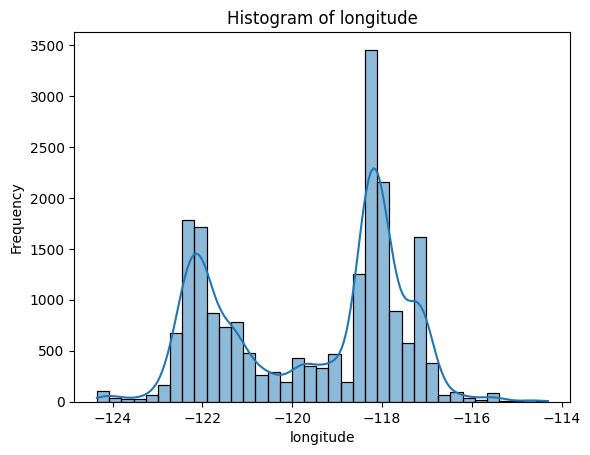

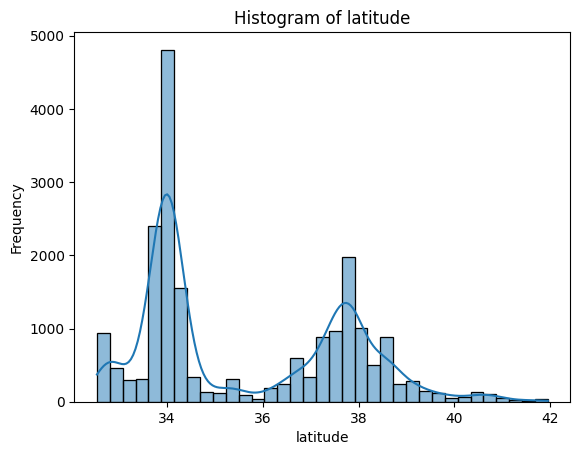

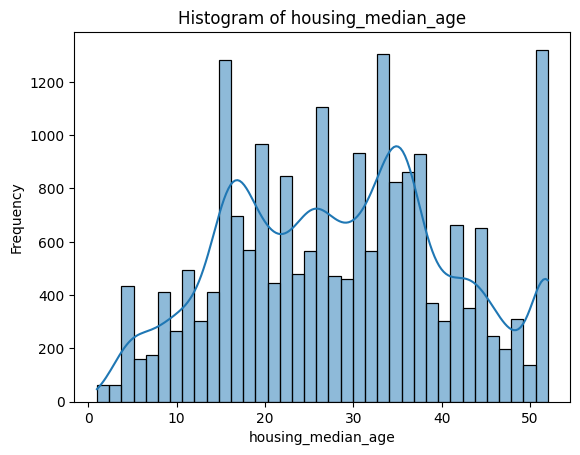

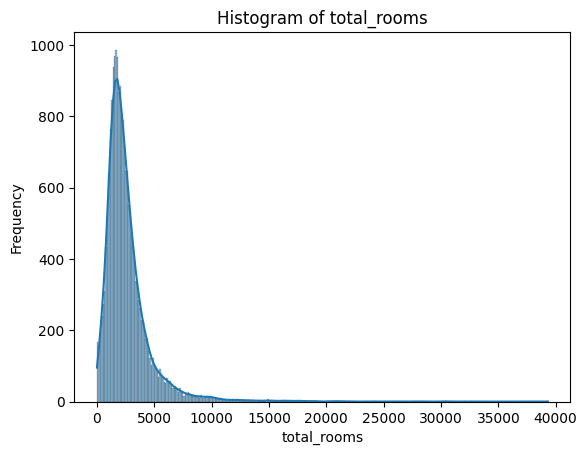

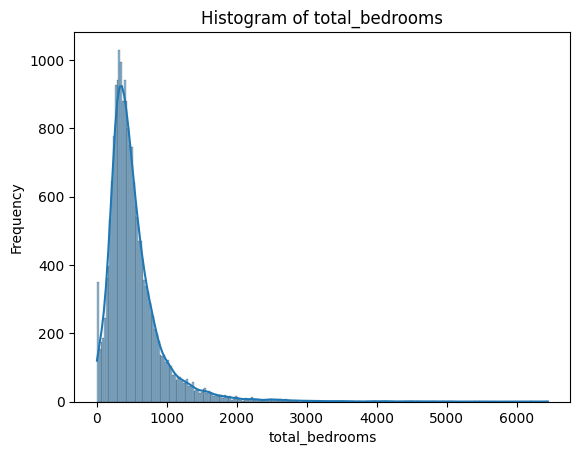

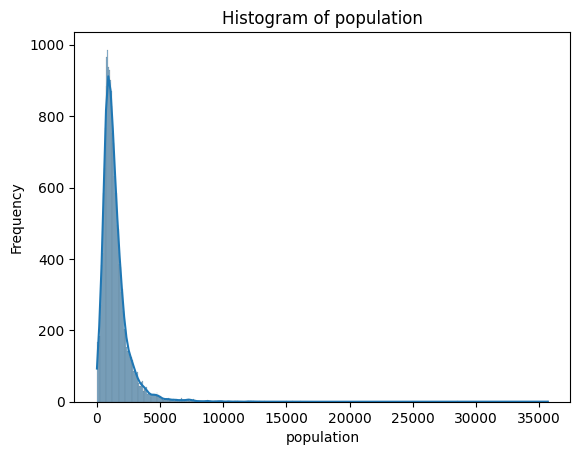

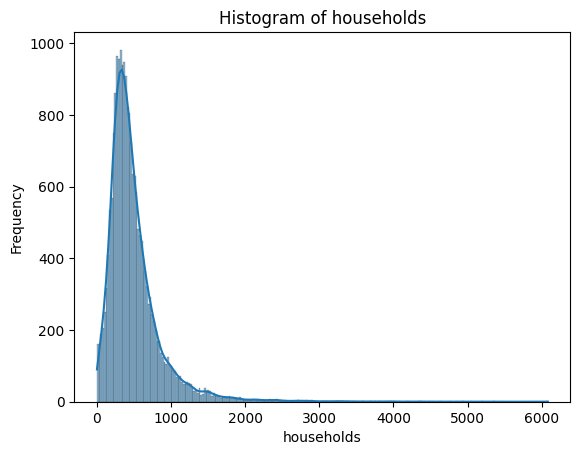

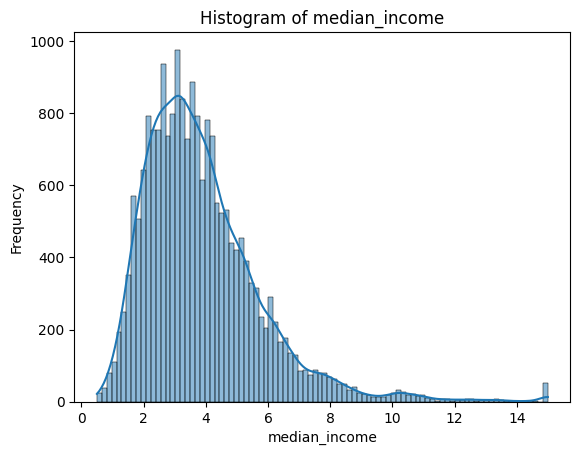

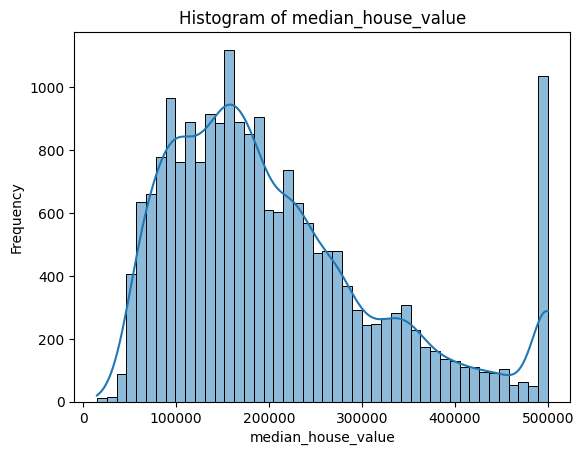

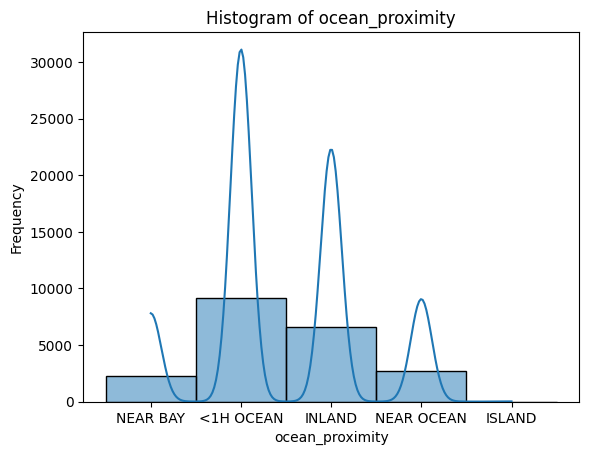

In [10]:
### 5) histograma para cada columna

import seaborn as sns
for column in df.columns:
    plt.figure()
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [11]:
import statistics
T = np.array([58, 57, 57, 52, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
print(len(T)/4)
print(statistics.median(T))

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]
6.0
70.0


88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7cfee8628890>,
 'caps': [<matplotlib.lines.Line2D at 0x7cfee8620990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cfee86f4250>],
 'medians': [<matplotlib.lines.Line2D at 0x7cfee862b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cfee863c110>],
 'means': []}

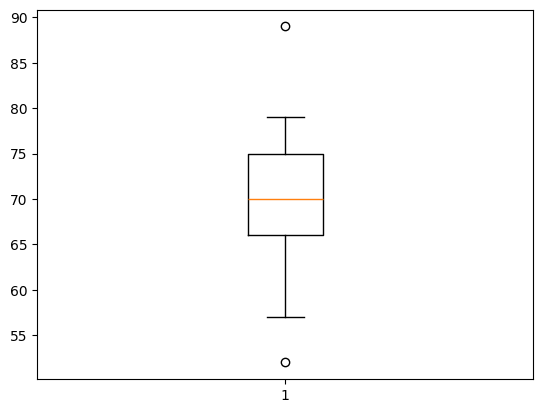

In [12]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

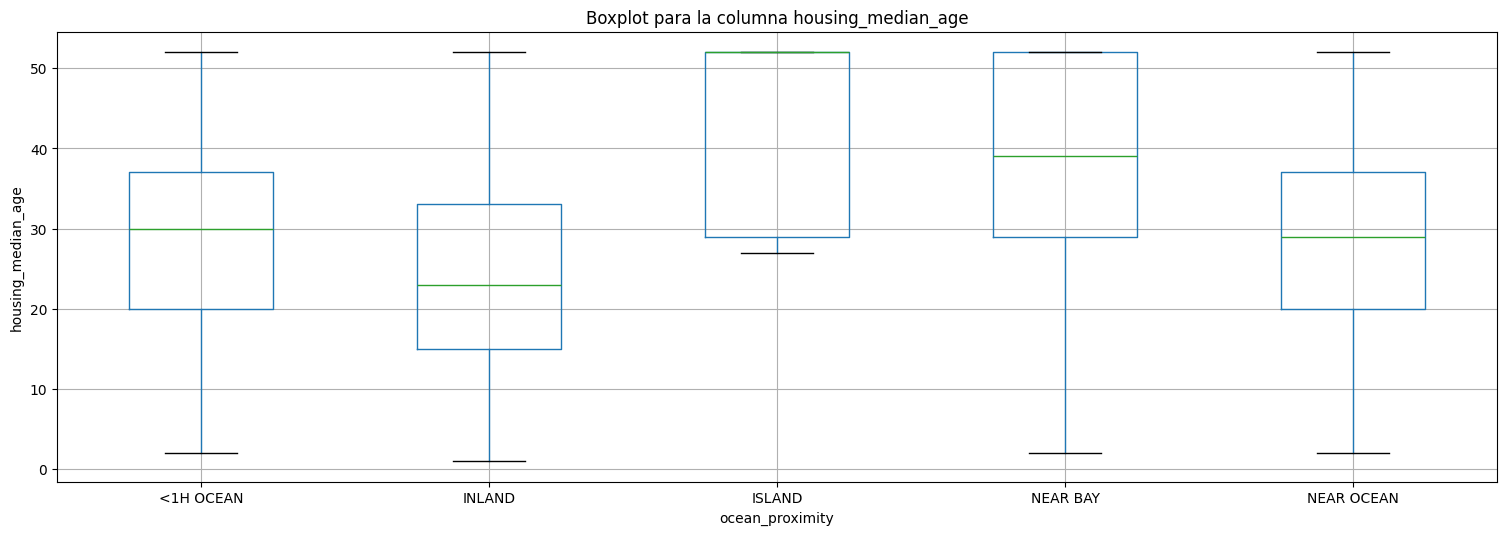

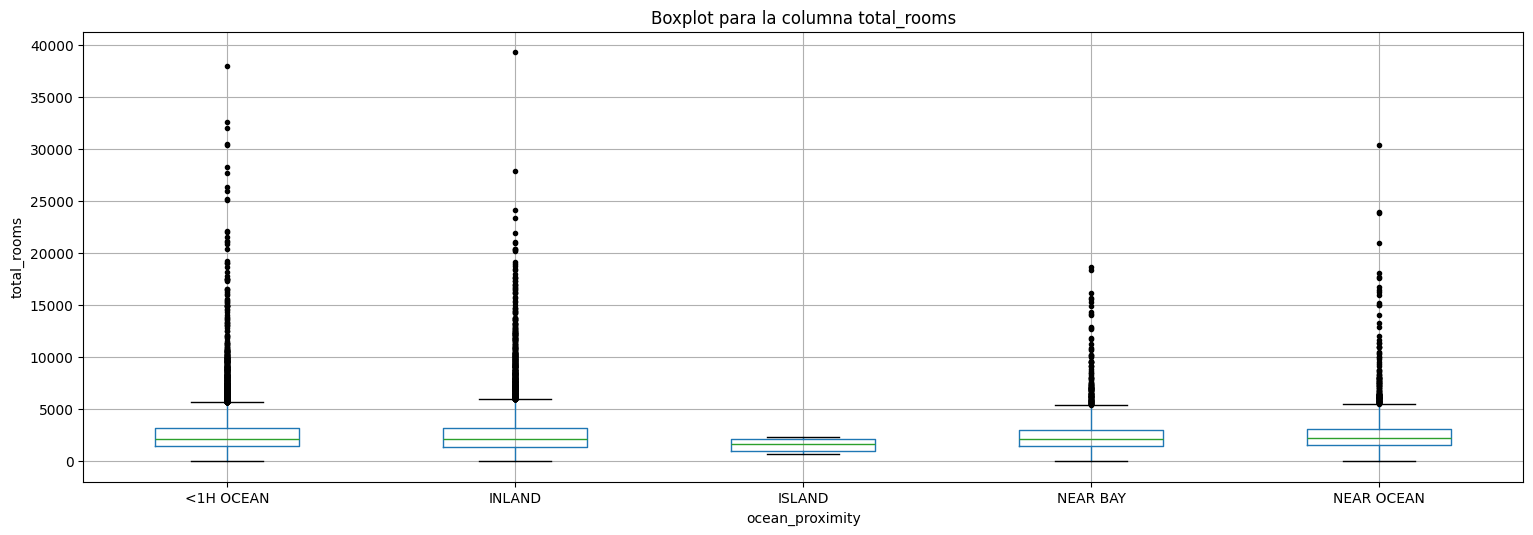

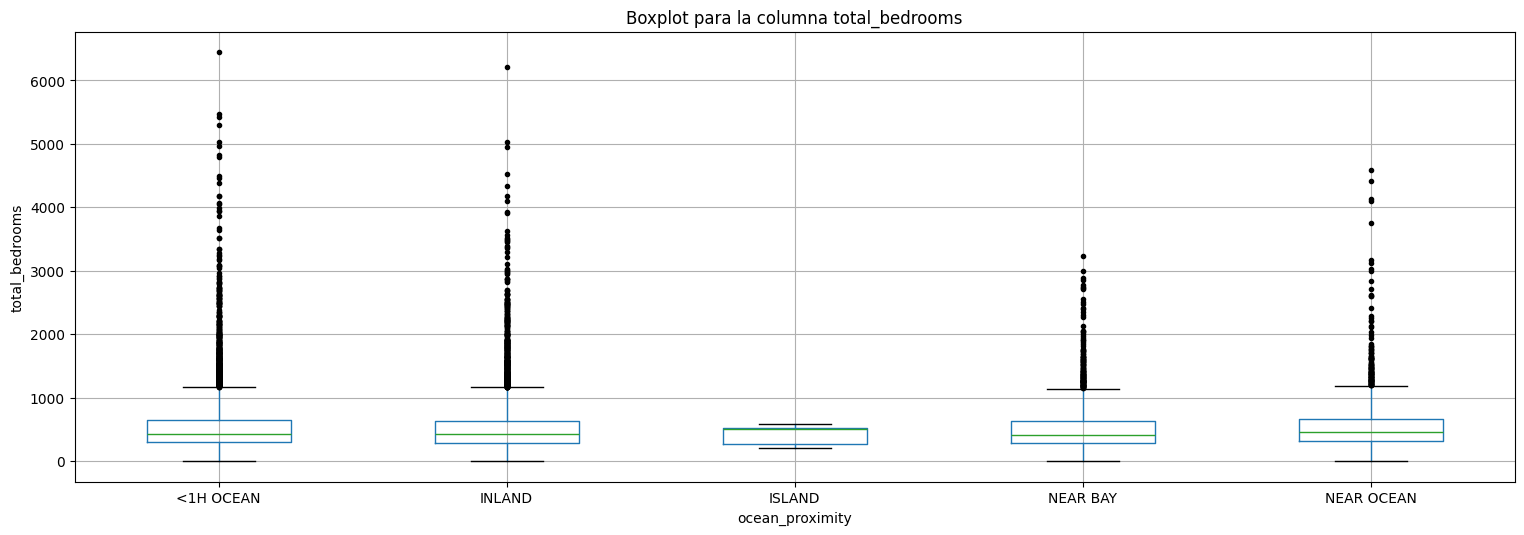

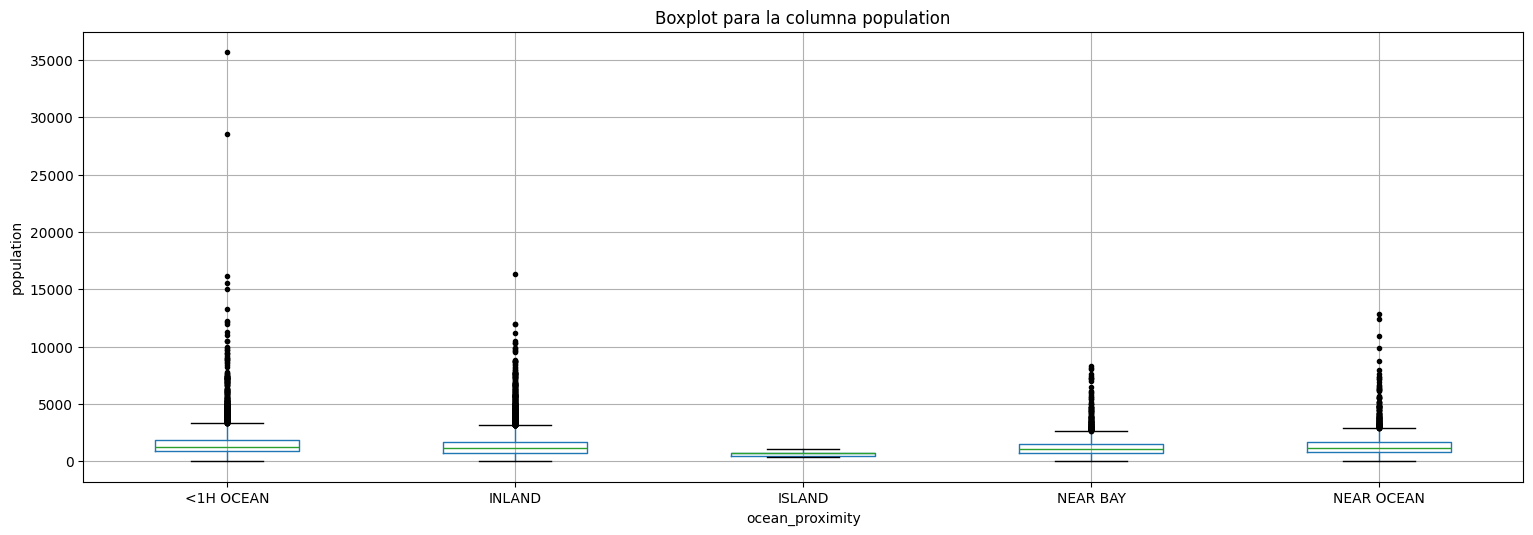

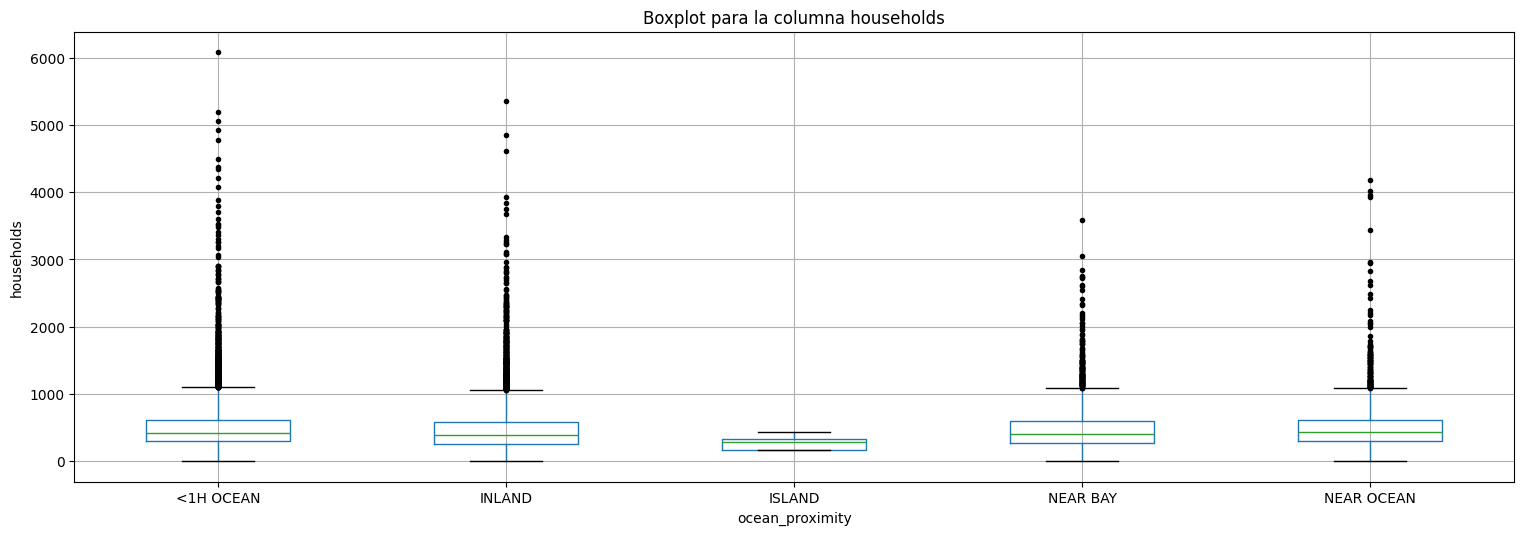

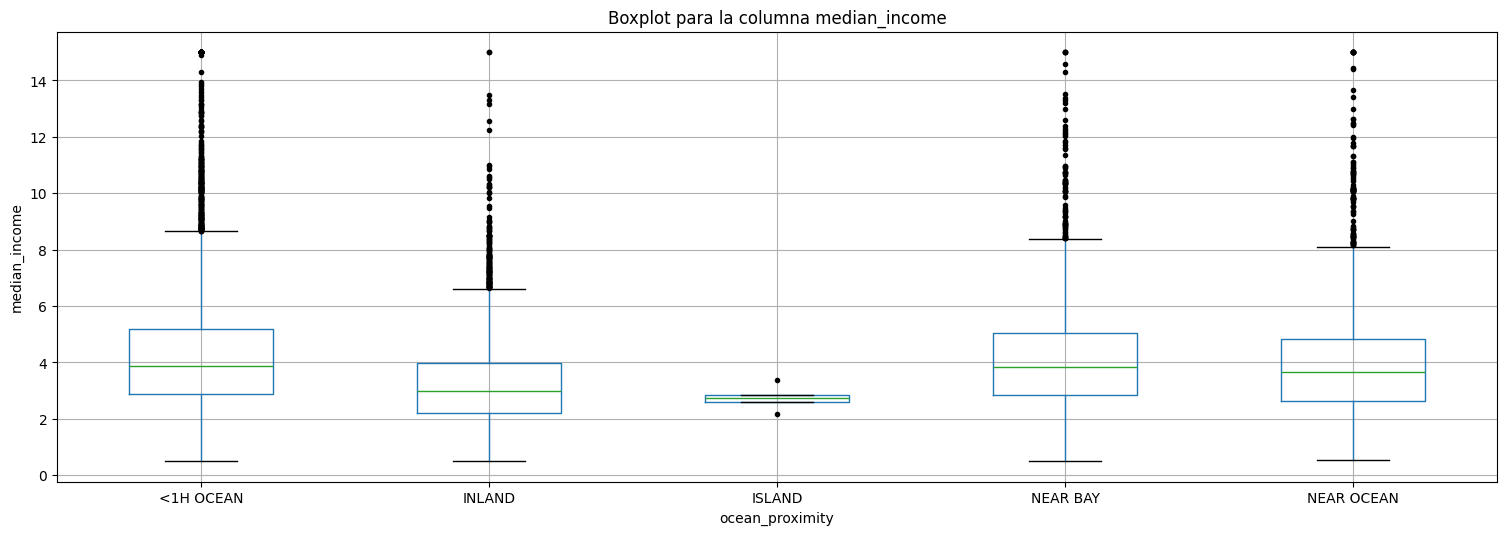

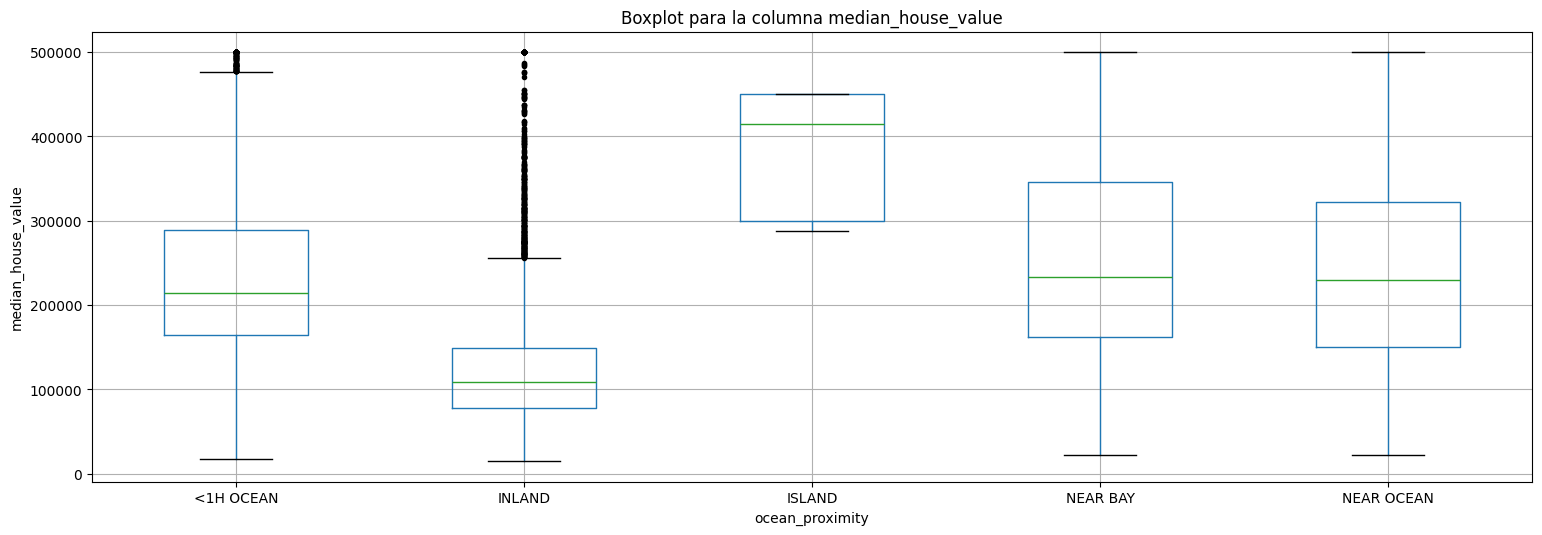

In [13]:
for colum in cols:
  # draw boxplot
  df.boxplot(column=colum, by='ocean_proximity', sym = 'k.', figsize=(18,6))
  # set title
  plt.suptitle('')  # Quita el título automático de pandas
  plt.title(f'Boxplot para la columna {colum}')
  plt.xlabel('ocean_proximity')
  plt.ylabel(colum)
  plt.show()

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


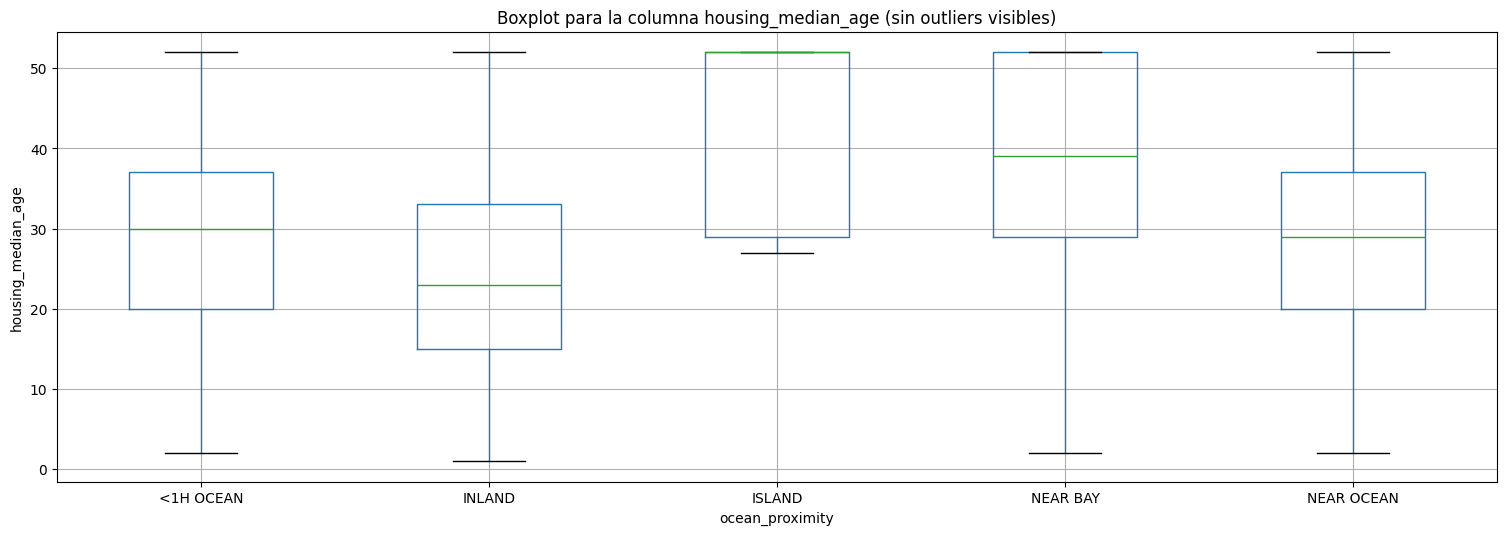

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


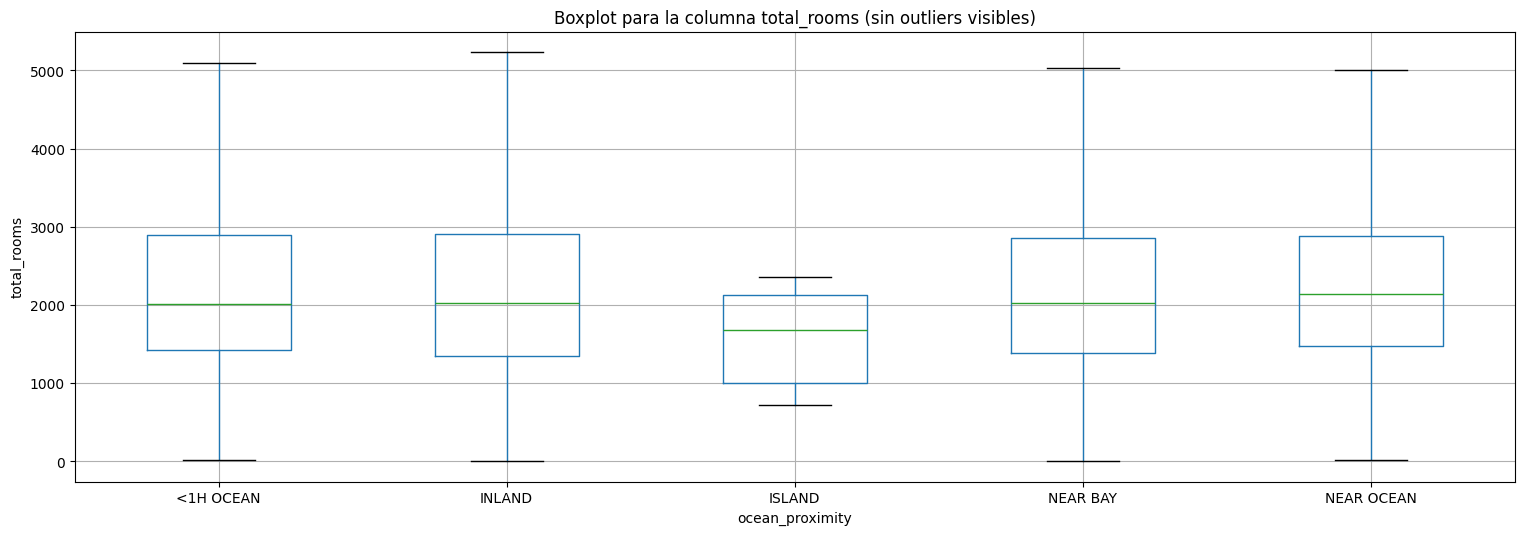

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


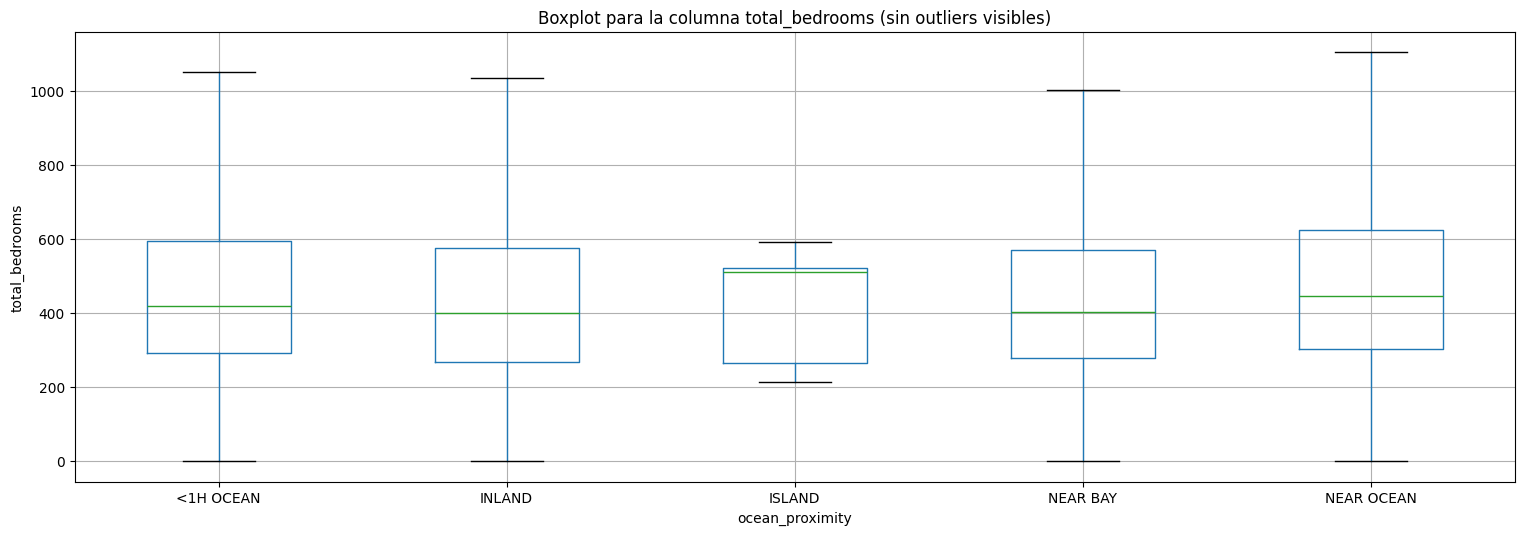

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


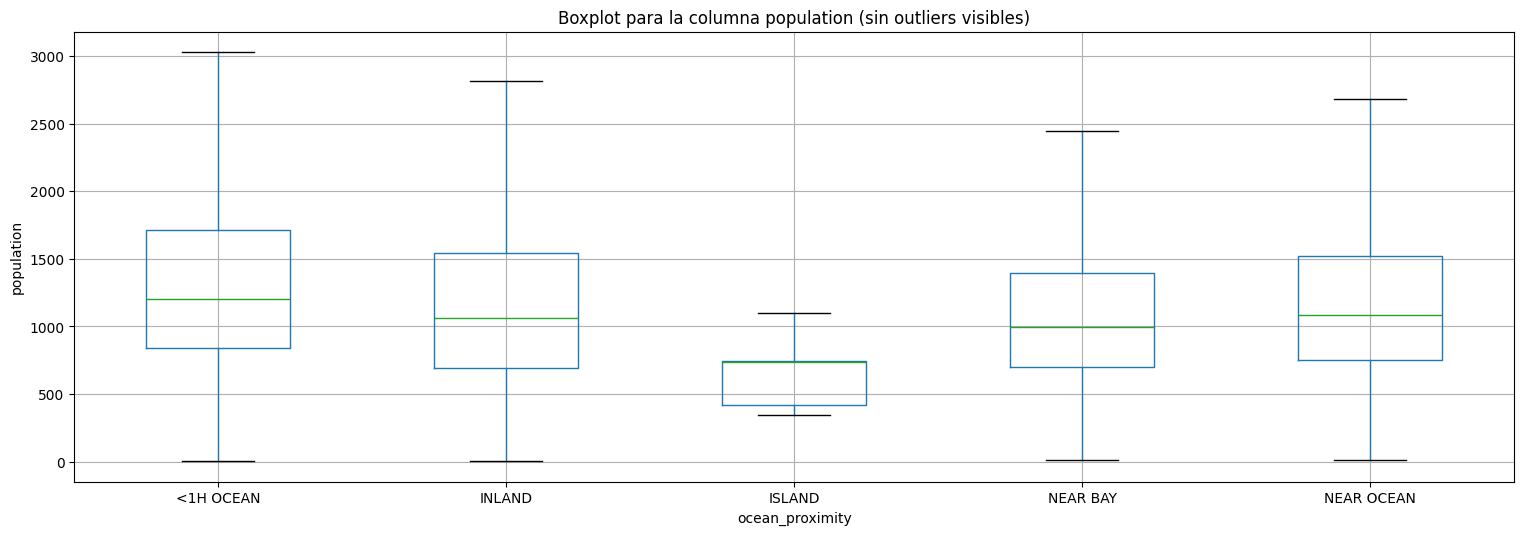

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


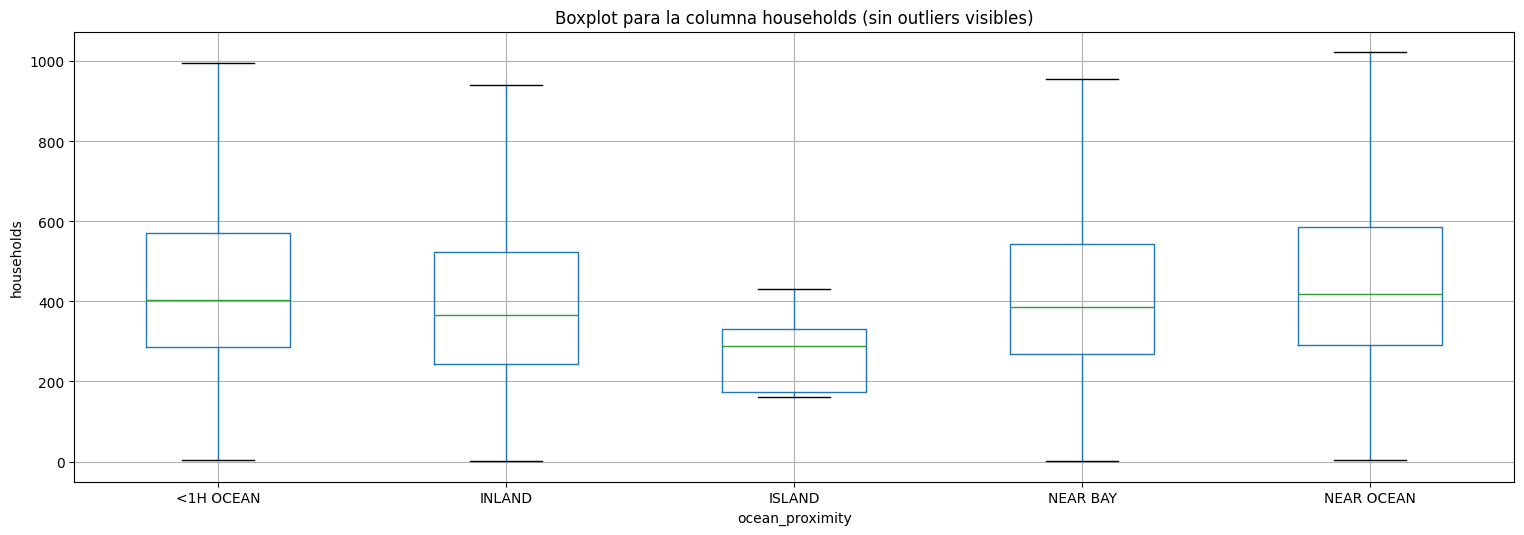

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


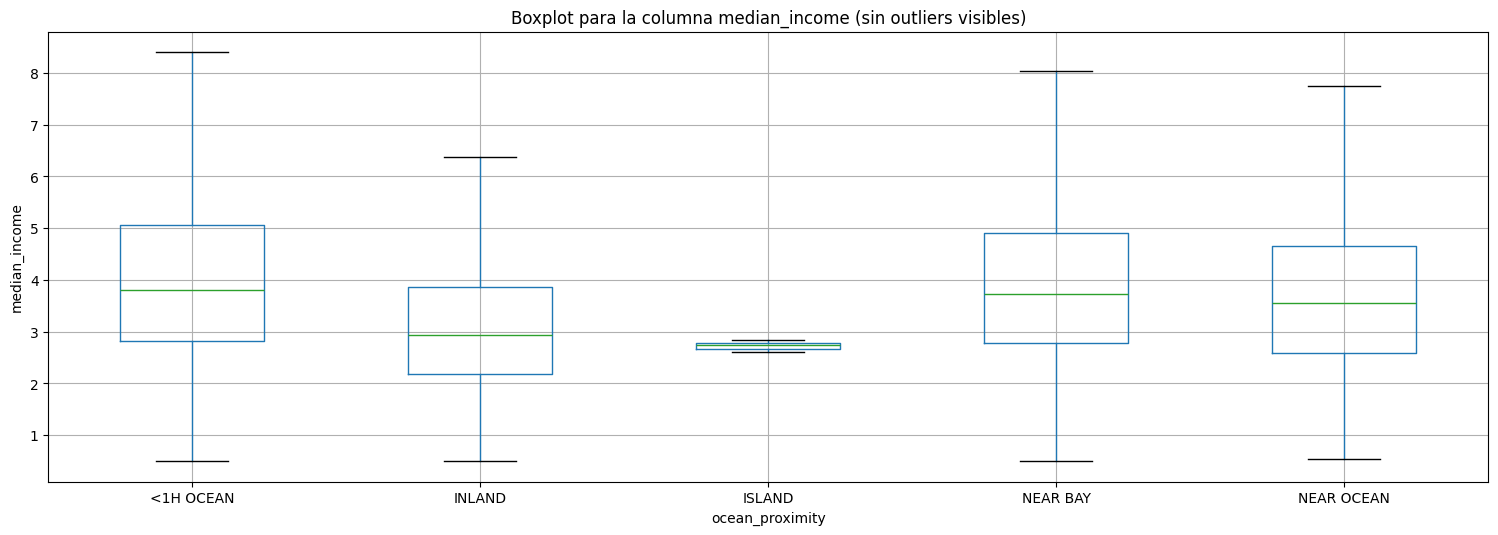

/tmp/ipython-input-14-3305152530.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)


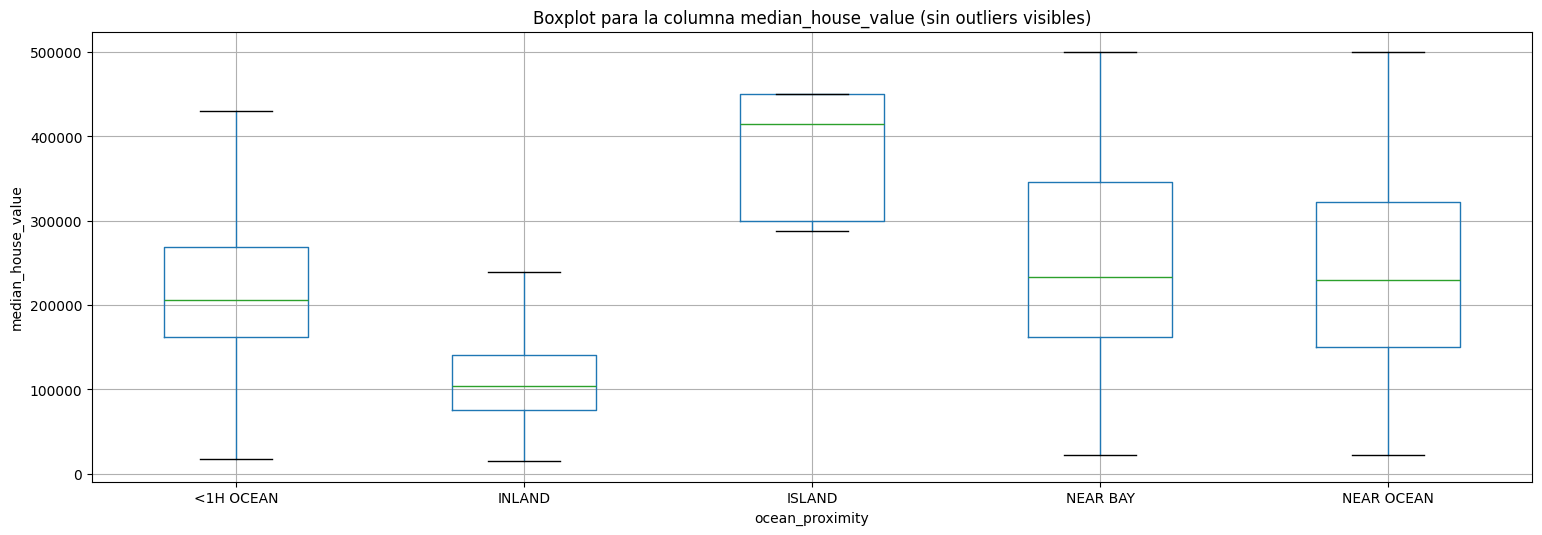

In [14]:
for colum in cols:
    # Función para filtrar outliers solo en la columna actual
    def filtrar_outliers(grupo):
        Q1 = grupo[colum].quantile(0.25)
        Q3 = grupo[colum].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        return grupo[(grupo[colum] >= lim_inf) & (grupo[colum] <= lim_sup)]

    # Aplicar filtrado por grupo para esta columna
    df_filtrado = df.groupby('ocean_proximity', group_keys=False).apply(filtrar_outliers)

    # Dibujar boxplot con el dataframe filtrado
    df_filtrado.boxplot(column=colum, by='ocean_proximity', sym='', figsize=(18, 6))

    plt.title(f'Boxplot para la columna {colum} (sin outliers visibles)')
    plt.suptitle('')
    plt.xlabel('ocean_proximity')
    plt.ylabel(colum)
    plt.show()


8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

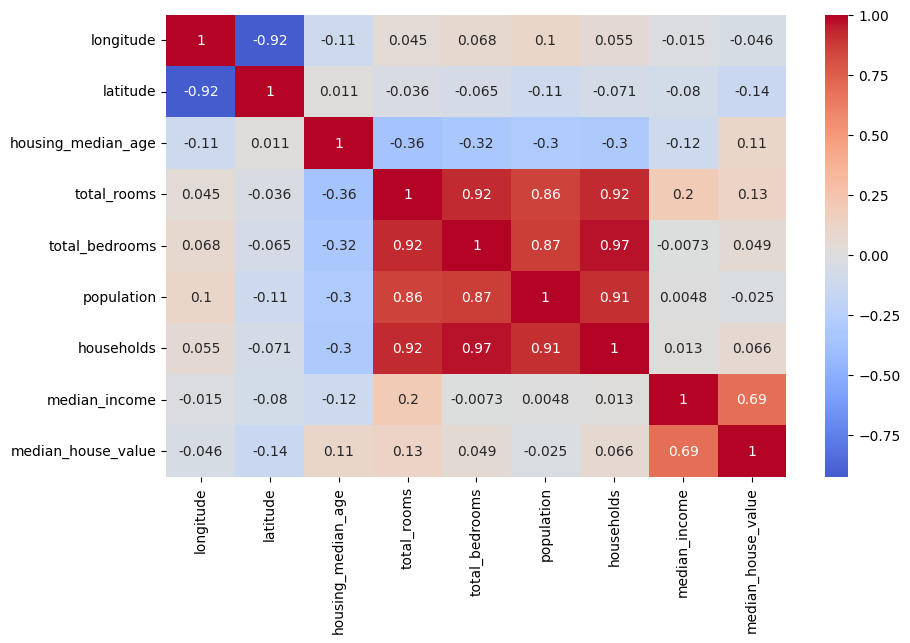

In [15]:
## 8) Se determina la correlación
df_sin_ocean = df.drop(columns=['ocean_proximity'])
corr_matrix = df_sin_ocean.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

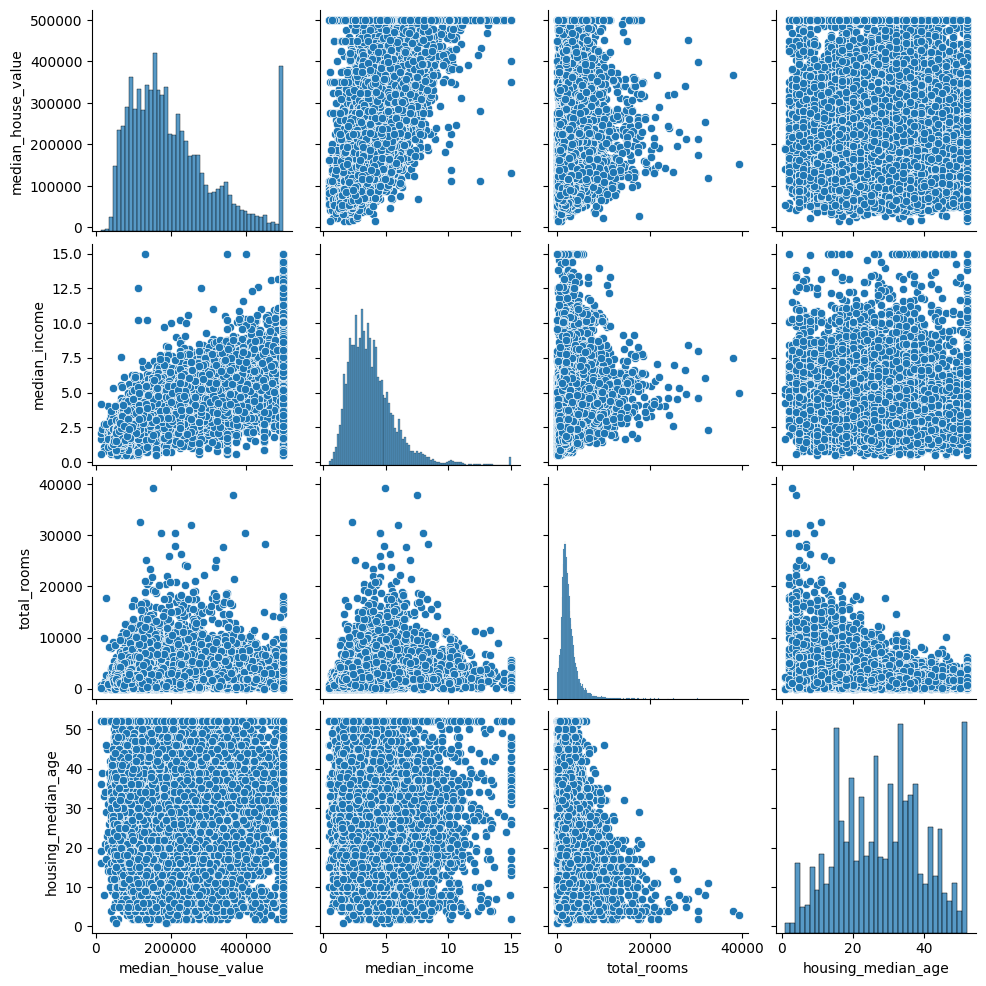

In [16]:
## 9) Gráfico pairplot
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols])
plt.show()

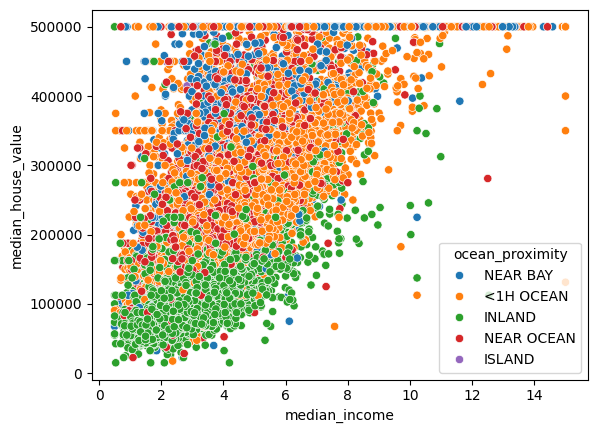

In [17]:
## 10) Gráfico scatterplot
sns.scatterplot(data=df, x="median_income", y="median_house_value", hue="ocean_proximity")
plt.show()

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [18]:
## 11)
from sklearn.model_selection import train_test_split
df = df_para_limpiar
# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


El anterior código sí es óptimo para separar el código, puesto que, elige un porcentaje adecuado de datos para el entrenamiento y otro para su posterior evaluación

<Axes: >

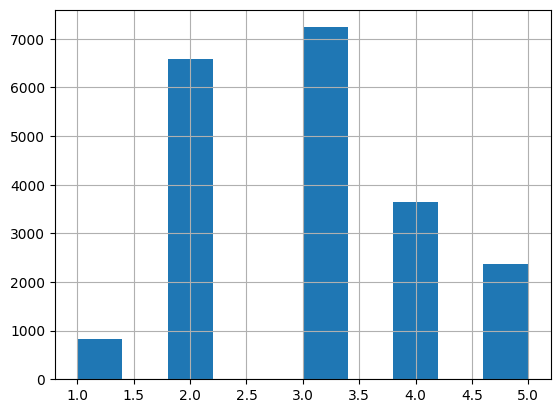

In [19]:
## 12)
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [22]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [23]:
df["income_cat"].value_counts() / len(df)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [24]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


De lo anterior se observa que, la distribución no es equitativa entre las 5 categorías. La mayoría de los datos se concentran en las categorías 2 y 3, que representan más del 67% del total. Esto sugiere que la mayoría de las viviendas están en zonas con ingresos medianos-bajos a medianos.Dado que hay desequilibrio entre categorías, una división aleatoria (train_test_split) no garantiza que las proporciones se mantengan.
Por eso, usar StratifiedShuffleSplit es una mejor práctica para que los subconjuntos (train/test) mantengan la misma distribución que el dataset completo.

In [26]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)


,count
income_cat,
3,0.348716
2,0.324188
4,0.173147
5,0.114159
1,0.039789


Con otro parámetro de aleatoriedad los  grupos de datos se siguen ajustando bien respecto a los originales

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






In [27]:
## 14)
df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [28]:
from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

df_train_num = train_set.drop("ocean_proximity", axis=1)
df_test_num = test_set.drop("ocean_proximity", axis=1)
df_train_num


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
17142,-122.18,37.45,43.0,2061.0,437.0,817.0,385.0,4.4688,460200.0,3
5460,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.6042,305800.0,2
7920,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,189700.0,3
15846,-122.43,37.75,40.0,4850.0,977.0,1824.0,952.0,5.0519,356100.0,4
18194,-122.02,37.38,32.0,1889.0,487.0,1321.0,508.0,3.2574,254400.0,3
...,...,...,...,...,...,...,...,...,...,...
13927,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,2
919,-121.96,37.51,22.0,5811.0,1125.0,3215.0,1086.0,4.4107,223500.0,3
5699,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,271900.0,3
10742,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,500001.0,5


In [29]:
df_test_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
4648,-118.31,34.06,31.0,2827.0,1084.0,3107.0,993.0,2.0278,360000.0,2
8740,-118.31,33.81,30.0,1773.0,356.0,905.0,352.0,4.3056,336000.0,3
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,269900.0,3
15735,-122.43,37.78,26.0,3587.0,1034.0,1821.0,936.0,2.6392,287500.0,2
18380,-121.86,37.21,23.0,2552.0,305.0,916.0,316.0,9.1974,500001.0,5
...,...,...,...,...,...,...,...,...,...,...
1554,-121.98,37.80,16.0,2498.0,330.0,1027.0,343.0,8.1550,343700.0,5
130,-122.21,37.84,34.0,3038.0,490.0,1140.0,496.0,7.0548,325900.0,5
537,-122.30,37.77,42.0,2038.0,368.0,2037.0,355.0,2.6447,200000.0,2
15982,-122.47,37.76,52.0,2941.0,783.0,1545.0,726.0,2.9899,406500.0,2


In [30]:
imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)
imp_mean.fit(df_test_num)

imp_mean.statistics_

array([-1.19550746e+02,  3.55947359e+01,  2.86828973e+01,  2.65616739e+03,
        5.35453520e+02,  1.42266328e+03,  4.98374031e+02,  3.93071051e+00,
        2.10699344e+05,  3.04263566e+00])

In [31]:
df_train_num.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
income_cat,category


In [32]:
df_train_num = df_train_num.select_dtypes(include=["number"])
df_train_num.median()

,0
longitude,-118.50000
latitude,34.26000
housing_median_age,29.00000
total_rooms,2125.00000
total_bedrooms,436.00000
population,1166.00000
households,410.00000
median_income,3.51695
median_house_value,178700.00000


In [33]:
imp_mean.fit(df_train_num)
X = imp_mean.transform(df_train_num)
X


array([[-1.22180e+02,  3.74500e+01,  4.30000e+01, ...,  3.85000e+02,
         4.46880e+00,  4.60200e+05],
       [-1.18470e+02,  3.40000e+01,  3.70000e+01, ...,  7.37000e+02,
         2.60420e+00,  3.05800e+05],
       [-1.18070e+02,  3.38600e+01,  2.80000e+01, ...,  3.30000e+02,
         3.42500e+00,  1.89700e+05],
       ...,
       [-1.18260e+02,  3.42400e+01,  4.20000e+01, ...,  2.00000e+02,
         4.48210e+00,  2.71900e+05],
       [-1.17910e+02,  3.36100e+01,  3.80000e+01, ...,  1.71000e+02,
         1.10750e+01,  5.00001e+05],
       [-1.22330e+02,  3.75700e+01,  2.70000e+01, ...,  8.96000e+02,
         3.43330e+00,  2.90000e+05]])

In [34]:
imp_mean.fit(df_test_num)
Y = imp_mean.transform(df_test_num)
Y

array([[-1.1831e+02,  3.4060e+01,  3.1000e+01, ...,  2.0278e+00,
         3.6000e+05,  2.0000e+00],
       [-1.1831e+02,  3.3810e+01,  3.0000e+01, ...,  4.3056e+00,
         3.3600e+05,  3.0000e+00],
       [-1.2224e+02,  3.7810e+01,  5.2000e+01, ...,  3.6750e+00,
         2.6990e+05,  3.0000e+00],
       ...,
       [-1.2230e+02,  3.7770e+01,  4.2000e+01, ...,  2.6447e+00,
         2.0000e+05,  2.0000e+00],
       [-1.2247e+02,  3.7760e+01,  5.2000e+01, ...,  2.9899e+00,
         4.0650e+05,  2.0000e+00],
       [-1.1778e+02,  3.3820e+01,  1.2000e+01, ...,  9.1808e+00,
         4.1370e+05,  5.0000e+00]])

In [35]:
## Matriz de características
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.18,37.45,43.0,2061.0,437.0,817.0,385.0,4.4688,460200.0
1,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.6042,305800.0
2,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,189700.0
3,-122.43,37.75,40.0,4850.0,977.0,1824.0,952.0,5.0519,356100.0
4,-122.02,37.38,32.0,1889.0,487.0,1321.0,508.0,3.2574,254400.0
...,...,...,...,...,...,...,...,...,...
16507,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
16508,-121.96,37.51,22.0,5811.0,1125.0,3215.0,1086.0,4.4107,223500.0
16509,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,271900.0
16510,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,500001.0


In [36]:
housing_ts = pd.DataFrame(Y, columns=df_test_num.columns)
housing_ts

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,-118.31,34.06,31.0,2827.0,1084.0,3107.0,993.0,2.0278,360000.0,2.0
1,-118.31,33.81,30.0,1773.0,356.0,905.0,352.0,4.3056,336000.0,3.0
2,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,269900.0,3.0
3,-122.43,37.78,26.0,3587.0,1034.0,1821.0,936.0,2.6392,287500.0,2.0
4,-121.86,37.21,23.0,2552.0,305.0,916.0,316.0,9.1974,500001.0,5.0
...,...,...,...,...,...,...,...,...,...,...
4123,-121.98,37.80,16.0,2498.0,330.0,1027.0,343.0,8.1550,343700.0,5.0
4124,-122.21,37.84,34.0,3038.0,490.0,1140.0,496.0,7.0548,325900.0,5.0
4125,-122.30,37.77,42.0,2038.0,368.0,2037.0,355.0,2.6447,200000.0,2.0
4126,-122.47,37.76,52.0,2941.0,783.0,1545.0,726.0,2.9899,406500.0,2.0


In [37]:
## Manejo de texto y atributos categoricos
from sklearn.preprocessing import OneHotEncoder
train_set["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [38]:
housing_cat = train_set[["ocean_proximity"]]
housing_cat


,ocean_proximity
17142,NEAR BAY
5460,<1H OCEAN
7920,<1H OCEAN
15846,NEAR BAY
18194,<1H OCEAN
...,...
13927,INLAND
919,<1H OCEAN
5699,<1H OCEAN
10742,<1H OCEAN


In [39]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [40]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
df_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0
16508,1.0,0.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


In [41]:
housing_tr_ = housing_tr.join(df_cat_1hot)
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.18,37.45,43.0,2061.0,437.0,817.0,385.0,4.4688,460200.0,0.0,0.0,0.0,1.0,0.0
1,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.6042,305800.0,1.0,0.0,0.0,0.0,0.0
2,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,189700.0,1.0,0.0,0.0,0.0,0.0
3,-122.43,37.75,40.0,4850.0,977.0,1824.0,952.0,5.0519,356100.0,0.0,0.0,0.0,1.0,0.0
4,-122.02,37.38,32.0,1889.0,487.0,1321.0,508.0,3.2574,254400.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,0.0,1.0,0.0,0.0,0.0
16508,-121.96,37.51,22.0,5811.0,1125.0,3215.0,1086.0,4.4107,223500.0,1.0,0.0,0.0,0.0,0.0
16509,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,271900.0,1.0,0.0,0.0,0.0,0.0
16510,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,500001.0,1.0,0.0,0.0,0.0,0.0


In [42]:
## Realizando el mismo procedimiento para los datos de prueba
from sklearn.preprocessing import OneHotEncoder

test_set["ocean_proximity"].unique()
housing_cat = test_set[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
housing_ts_ = housing_ts.join(df_cat_1hot)
housing_ts_


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.31,34.06,31.0,2827.0,1084.0,3107.0,993.0,2.0278,360000.0,2.0,1.0,0.0,0.0,0.0,0.0
1,-118.31,33.81,30.0,1773.0,356.0,905.0,352.0,4.3056,336000.0,3.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,269900.0,3.0,0.0,0.0,0.0,1.0,0.0
3,-122.43,37.78,26.0,3587.0,1034.0,1821.0,936.0,2.6392,287500.0,2.0,0.0,0.0,0.0,1.0,0.0
4,-121.86,37.21,23.0,2552.0,305.0,916.0,316.0,9.1974,500001.0,5.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-121.98,37.80,16.0,2498.0,330.0,1027.0,343.0,8.1550,343700.0,5.0,1.0,0.0,0.0,0.0,0.0
4124,-122.21,37.84,34.0,3038.0,490.0,1140.0,496.0,7.0548,325900.0,5.0,0.0,0.0,0.0,1.0,0.0
4125,-122.30,37.77,42.0,2038.0,368.0,2037.0,355.0,2.6447,200000.0,2.0,0.0,0.0,0.0,1.0,0.0
4126,-122.47,37.76,52.0,2941.0,783.0,1545.0,726.0,2.9899,406500.0,2.0,0.0,0.0,0.0,1.0,0.0


In [43]:
## Escalamiento de variables
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale_tr = housing_tr_[cols]
housing_scale_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.18,37.45,43.0,2061.0,437.0,817.0,385.0,4.4688,0.0,0.0,0.0,1.0,0.0
1,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.6042,1.0,0.0,0.0,0.0,0.0
2,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,1.0,0.0,0.0,0.0,0.0
3,-122.43,37.75,40.0,4850.0,977.0,1824.0,952.0,5.0519,0.0,0.0,0.0,1.0,0.0
4,-122.02,37.38,32.0,1889.0,487.0,1321.0,508.0,3.2574,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,0.0,1.0,0.0,0.0,0.0
16508,-121.96,37.51,22.0,5811.0,1125.0,3215.0,1086.0,4.4107,1.0,0.0,0.0,0.0,0.0
16509,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,1.0,0.0,0.0,0.0,0.0
16510,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,1.0,0.0,0.0,0.0,0.0


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(housing_scale_tr)

X = scaler.transform(housing_scale_tr)


housing_prepared_tr = pd.DataFrame(X, columns = housing_scale_tr.columns)
housing_prepared_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.216135,0.521785,0.823529,0.052271,0.067660,0.022815,0.063148,0.273713,0.0,0.0,0.0,1.0,0.0
1,0.585657,0.155154,0.705882,0.065625,0.118560,0.050394,0.121033,0.145122,1.0,0.0,0.0,0.0,0.0
2,0.625498,0.140276,0.529412,0.045353,0.054469,0.037669,0.054103,0.201728,1.0,0.0,0.0,0.0,0.0
3,0.191235,0.553666,0.764706,0.123213,0.151459,0.051038,0.156389,0.313927,0.0,0.0,0.0,1.0,0.0
4,0.232072,0.514346,0.607843,0.047896,0.075419,0.036940,0.083374,0.190170,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.971116,0.243358,0.882353,0.037925,0.047796,0.021974,0.044401,0.116612,0.0,1.0,0.0,0.0,0.0
16508,0.238048,0.528162,0.411765,0.147657,0.174426,0.090025,0.178425,0.269707,1.0,0.0,0.0,0.0,0.0
16509,0.606574,0.180659,0.803922,0.022486,0.027623,0.015471,0.032725,0.274631,1.0,0.0,0.0,0.0,0.0
16510,0.641434,0.113709,0.725490,0.031185,0.027467,0.011407,0.027956,0.729307,1.0,0.0,0.0,0.0,0.0


In [45]:
## Se realiza un procedimiento similar para las variables de prueba
housing_scale_ts = housing_ts_[cols]
scaler.fit(housing_scale_ts)

Y = scaler.transform(housing_scale_ts)


housing_prepared_ts = pd.DataFrame(Y, columns = housing_scale_ts.columns)
housing_prepared_ts

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.616910,0.161290,0.58,0.074469,0.197842,0.192417,0.191055,0.103138,1.0,0.0,0.0,0.0,0.0
1,0.616910,0.134409,0.56,0.046685,0.064728,0.055783,0.067476,0.260618,1.0,0.0,0.0,0.0,0.0
2,0.206681,0.564516,1.00,0.066192,0.091424,0.064656,0.099479,0.217020,0.0,0.0,0.0,1.0,0.0
3,0.186848,0.561290,0.48,0.094504,0.188700,0.112621,0.180066,0.145408,0.0,0.0,0.0,1.0,0.0
4,0.246347,0.500000,0.42,0.067220,0.055403,0.056466,0.060536,0.598821,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.233820,0.563441,0.28,0.065797,0.059974,0.063353,0.065741,0.526752,1.0,0.0,0.0,0.0,0.0
4124,0.209812,0.567742,0.64,0.080032,0.089230,0.070365,0.095238,0.450688,0.0,0.0,0.0,1.0,0.0
4125,0.200418,0.560215,0.80,0.053671,0.066923,0.126024,0.068055,0.145789,0.0,0.0,0.0,1.0,0.0
4126,0.182672,0.559140,1.00,0.077475,0.142805,0.095495,0.139580,0.169655,0.0,0.0,0.0,1.0,0.0


#### 18)
Finalizado el proceso requerido para obtener el dataframe listo para realizar el proceso de análisis se puede concluir que, se ha garantizado datos numéricos, sin valores faltantes, y bien escalados, indispensable para que la regresión lineal funcione bien.Por otro lado, el modelo es válido si y solo si la relación entre las variables y la salida es aproximadamente lineal. Si hay no linealidad fuerte o relaciones complejas, un modelo lineal no capturará bien los patrones.

#### 19)
Podría inciarse con un modelo de regresión lineal, sin embargo, estadisticamente se observa que, hay relaciones no lineales fuertes, por tanto, puede ser necesario emplear otro modelo.

In [46]:
## 20)
from sklearn.model_selection import train_test_split

y_train = housing_tr_["median_house_value"]

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_tr, y_train)

# Predecir sobre el conjunto de prueba
y_pred = lin_reg.predict(housing_prepared_ts)

# Calcular R²
y_test = housing_ts_["median_house_value"]
score = lin_reg.score(housing_prepared_ts, y_test)
print(f"R² del modelo de Regresión Lineal: {score:.4f}")


R² del modelo de Regresión Lineal: 0.2761


Como puede observarse, el score obtenido es bajo, luego este modelo lineal no es el óptimo para describir el conjunto de datos


####21)
Otros modelos podrían capturar relaciones no lineales, interacciones o patrones más complejos que la regresión lineal no ve.

In [47]:
### 22) Mediante Papeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression

# Identificar columnas
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Pipelines para cada tipo de dato
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(sparse_output=False))
])

# Combinar todo
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# Pipeline final: preparación + modelo
final_pipeline = Pipeline([
    ("prep", full_pipeline),
    ("lin_reg", LinearRegression())
])

# Entrenar todo junto
final_pipeline.fit(train_set, train_set["median_house_value"])

# Predecir
preds = final_pipeline.predict(test_set)
print(preds)

# Calcular R²
score = final_pipeline.score(test_set, test_set["median_house_value"])
print(f"R² del modelo final: {score:.4f}")


[168513.61755713 248976.65860543 261557.62191505 ... 156072.55187869
 257357.94879238 381786.65579906]
R² del modelo final: 0.6440
